**An example to produce word cloud for Chinese text**


Key points:


* Intro to Colab
* Simple text processing in Python 
* Useful third-party libraries e.g. opencc, jieba, wordcloud




In [1]:
#-*- coding: utf-8 -*-
import glob
import json

In [2]:
# Downloading a repo of chinese poetry corpus
!git clone https://github.com/chinese-poetry/chinese-poetry

Cloning into 'chinese-poetry'...
remote: Enumerating objects: 5843, done.
remote: Total 5843 (delta 0), reused 0 (delta 0), pack-reused 5843
Receiving objects: 100% (5843/5843), 185.72 MiB | 26.50 MiB/s, done.
Resolving deltas: 100% (4524/4524), done.
Checking out files: 100% (1373/1373), done.


In [4]:
!pip install opencc

     |████████████████████████████████| 1.3MB 9.6MB/s 


In [7]:
# Ci(词) is located under ~/chinese-poetry/ci
# Poetry(诗) is located under ~/chinese-poetry/json
# poet name could be in trandition(繁體) or simple(简体) forms so its better to search for both
import opencc
converter_t2s = opencc.OpenCC('t2s.json') # 繁to简
converter_s2t = opencc.OpenCC('s2t.json') # 简to繁
# Set poet
poet_name_simple = "王安石"
poet_name = [poet_name_simple, converter_s2t.convert(poet_name_simple)]
# Set dynasty. Please note that poet and dynasty should match!
dynasty = "song" # choice from ["tang", "song"]

poet_corpus = []
for p_name in poet_name:
    # identify poerty files
    files = glob.glob("./chinese-poetry/json/poet.{}*.json".format(dynasty))
    files1 = glob.glob("./chinese-poetry/ci/*.json")
    # Combine 诗 and 词 files
    files.extend(files1)
    for file in files:
        with open(file) as fi:
            fi_json = json.load(fi)
            for poem in fi_json:
                if 'author' in poem and poem["author"] == p_name:
                    # if author matches, convert 诗 or 词 text to 简体
                    poet_corpus.append(converter_t2s.convert("".join(poem["paragraphs"])))

print(len(poet_corpus))

# Output corpus
poet_corpus_file_name = poet_name_simple
fo = open(poet_corpus_file_name, 'w')
for item in poet_corpus:
    fo.write(item)
    fo.write("\n")

3538


In [8]:
!pip install jieba

In [9]:
!pip install wordcloud

In [10]:
# Download this repo mainly for the cloud image and font ttf file.
!git clone https://github.com/MerakDipper/shiyun.git

Cloning into 'shiyun'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 30 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (30/30), done.


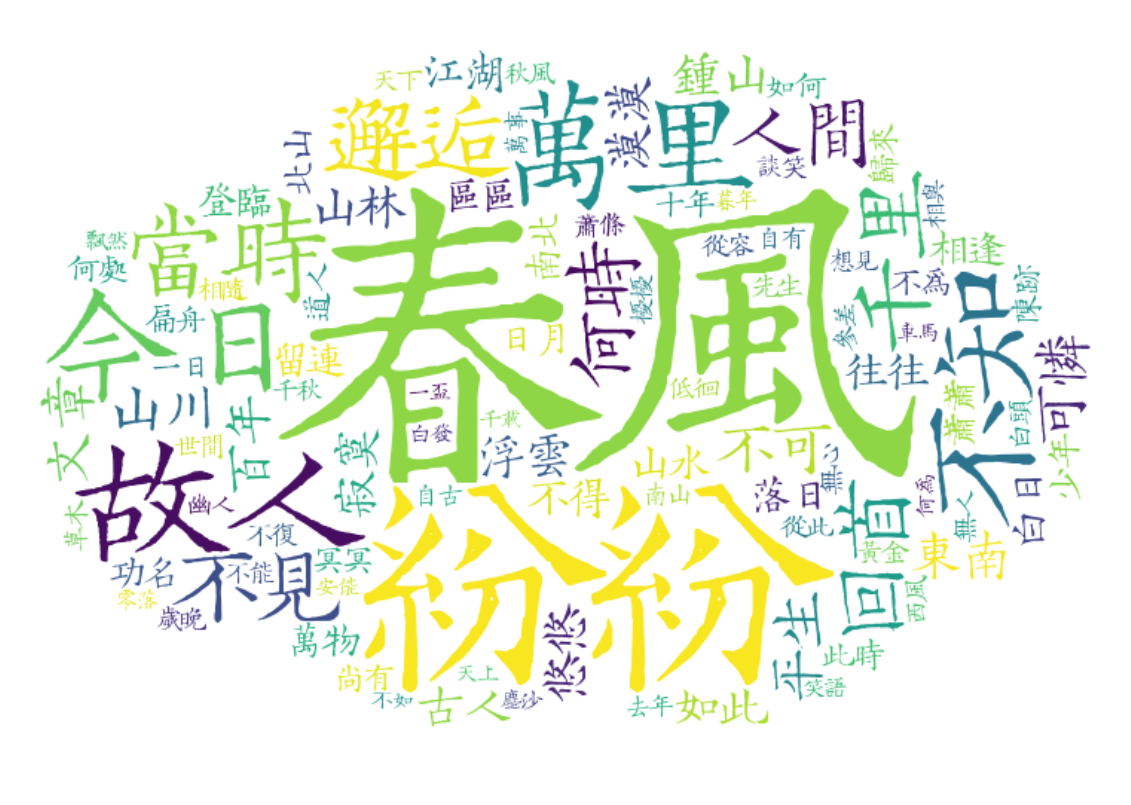

In [12]:
import jieba
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont
plt.rcParams['figure.dpi']= 250
# stopwords is optional. This can block some words from showing up in the final picture.
#stopwords = set()
#stopwords.add("故人")
#stopwords.add("不可")

# Read in poet corpus
poet_text_path = './'+poet_name_simple
text_from_file_with_apath = open(poet_text_path).read()

# Use jieba to split words automatically
wordlist_after_jieba = jieba.cut(text_from_file_with_apath, cut_all = True)
wl_space_split = " ".join(wordlist_after_jieba)

# Use wordcloud to calculate word frequency and produce picture automatically
back_img = np.array(Image.open("./shiyun/cloud5.png"))
my_wordcloud = WordCloud(font_path="./shiyun/ZiYueSongKeBenJianTi-2.ttf",
                           background_color="white",
                           max_words=100,
                           max_font_size=200,
                           width=1280,
                           #stopwords=stopwords,
                           mask=back_img,
                           height=800).generate(wl_space_split)

plt.imshow(my_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()